<a href="https://colab.research.google.com/github/samer-glitch/Leveraging-Machine-Learning-for-Identifying-and-Classifying-Cyber-Threats-in-Network-Environments/blob/main/Machine%20Learning%20Model%20Training%20and%20Evaluation%20with%20Feature%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Part A - Leveraging Machine Learning for Network Threat Detection and Performance Enhancement**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv


<ipython-input-3-8c608df3de4f>:134: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')


Dataset shape after removing duplicates: (99974, 50)
Number of instances: 99974


<ipython-input-3-8c608df3de4f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_label'] = 'normal'


**step 1 - label_traffic new column added to the dataset**

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Dataset Loaded and ready to be Preprocessed - Time Elapsed: 0:00:00.000056


**step 3 - NaN values and mixed types Handled**

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Categorical Labels Encoded - Time Elapsed: 0:00:00.299210


**step 4 - After Encodign categorical labels**

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,min_ps,max_ps,...,flowEndReason,category,application_protocol,web_service,traffic_label,proto_1.0,proto_6.0,proto_11.05591509707621,proto_17.0,traffic_label_encoded
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,22.0,7620.0,328.0,394.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,5670.0,328.0,354.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,43.0,15124.0,328.0,394.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,30.0,10086.0,328.0,352.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,56.0,56.0,56.0,...,2.0,Network,Unknown,ICMP,malicious,1,0,0,0,0


**Specific Features dropped**

,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,flowEnd,...,flowEndReason,category,application_protocol,web_service,traffic_label,proto_1.0,proto_6.0,proto_11.05591509707621,proto_17.0,traffic_label_encoded
0,192.168.121.1,67.0,172.16.255.185,67.0,22.0,7620.0,346.363636,25.010081,1.555954e+09,1.555955e+09,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
1,192.168.121.1,67.0,172.16.255.186,67.0,17.0,5670.0,333.529412,9.140200,1.555954e+09,1.555955e+09,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
2,192.168.121.1,67.0,172.16.255.185,67.0,43.0,15124.0,351.720930,26.098495,1.555964e+09,1.555965e+09,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
3,192.168.121.1,67.0,172.16.255.186,67.0,30.0,10086.0,336.200000,10.057833,1.555964e+09,1.555965e+09,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
4,192.168.121.1,0.0,10.130.1.166,0.0,1.0,56.0,56.000000,0.000000,1.555966e+09,1.555966e+09,...,2.0,Network,Unknown,ICMP,malicious,1,0,0,0,0


**Training Data (Features):**

,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,flowEnd,...,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,proto_1.0,proto_6.0,proto_11.05591509707621,proto_17.0
76373,192.168.122.58,50749.0,130.211.9.75,443.0,3.0,120.0,40.000000,0.000000,1.555969e+09,1.555969e+09,...,0.000295,0.00000,2.0,Web,TLS,Google,0,1,0,0
73520,192.168.122.58,49958.0,50.17.81.154,80.0,7.0,1558.0,222.571429,345.889684,1.555964e+09,1.555964e+09,...,0.187097,0.26091,2.0,Web,HTTP,Amazon,0,1,0,0
73923,192.168.122.58,51061.0,74.125.134.127,19302.0,16.0,864.0,54.000000,6.000000,1.555965e+09,1.555965e+09,...,10.070956,0.00038,2.0,Chat,STUN,Signal,0,0,0,1
12664,192.168.121.42,64724.0,172.16.255.200,53.0,2.0,204.0,102.000000,31.000000,1.555965e+09,1.555965e+09,...,0.000000,0.00000,2.0,Collaborative,DNS,Office365,0,0,0,1
6146,192.168.121.24,53948.0,172.16.255.200,53.0,4.0,316.0,79.000000,8.000000,1.555975e+09,1.555975e+09,...,2.684501,0.00000,2.0,Media,Unknown,DNS,0,0,0,1


**Training Data (Target):**

76373    1
73520    1
73923    0
12664    1
6146     0
Name: traffic_label_encoded, dtype: int64

**Testing Data (Features):**

,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,flowEnd,...,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,proto_1.0,proto_6.0,proto_11.05591509707621,proto_17.0
82262,192.168.122.72,50825.0,10.200.7.7,3128.0,21.0,8573.0,408.238095,894.866093,1.555969e+09,1.555969e+09,...,0.395122,0.597305,3.0,Web,Unknown,HTTP,0,1,0,0
43429,192.168.122.4,50026.0,10.200.7.4,3128.0,9.0,1780.0,197.777778,347.245279,1.555964e+09,1.555964e+09,...,0.030400,0.033300,3.0,Collaborative,HTTP,Office365,0,1,0,0
73951,192.168.122.58,64701.0,74.125.134.127,19302.0,10.0,540.0,54.000000,6.000000,1.555965e+09,1.555965e+09,...,12.588726,4.361393,2.0,VoIP,STUN,GoogleHangoutDuo,0,0,0,1
81074,192.168.122.68,55385.0,216.58.192.46,443.0,43.0,7976.0,185.488372,326.886324,1.555972e+09,1.555972e+09,...,13.347772,19.924390,3.0,Web,TLS,Google,0,1,0,0
75503,192.168.122.58,50644.0,35.170.103.121,443.0,14.0,2494.0,178.142857,244.610436,1.555969e+09,1.555969e+09,...,0.734941,1.466053,3.0,Web,Unknown,TLS,0,1,0,0


**Testing Data (Target):**

82262    0
43429    1
73951    0
81074    1
75503    0
Name: traffic_label_encoded, dtype: int64

Data Split into Training 80% and Testing 20% of the dataset - Time Elapsed: 0:00:00.588563
Scaling to numeric data Completed - Time Elapsed: 0:00:00.659614
step 5 - Scaling to numeric data Completed


**step 5 - Scaling oto numeric data Completed**

SMOT for class imbalance applied - Time Elapsed: 0:00:08.619037


**step 6 - SMOT applied**

StratifiedKFold 5 folds cross-validator Implemented - Time Elapsed: 0:00:08.623696


**step 7 - Cross validation 5 fold applied**

Hyperparameter Tuning applied to all models - Time Elapsed: 0:00:08.631211


**step 8 - Hyperparameter Tuning applied**

Classifiers Fitted - Time Elapsed: 0:01:57.701984


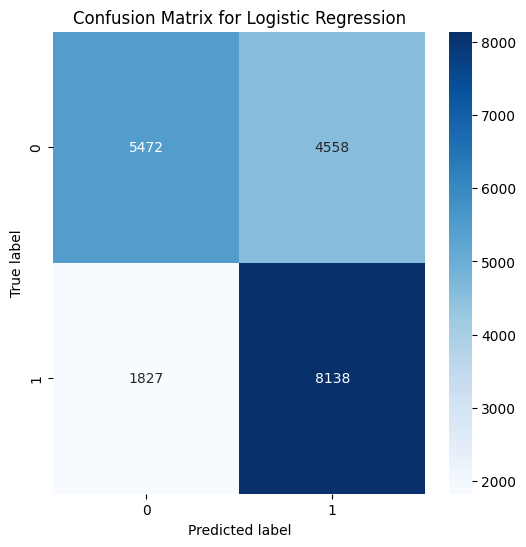

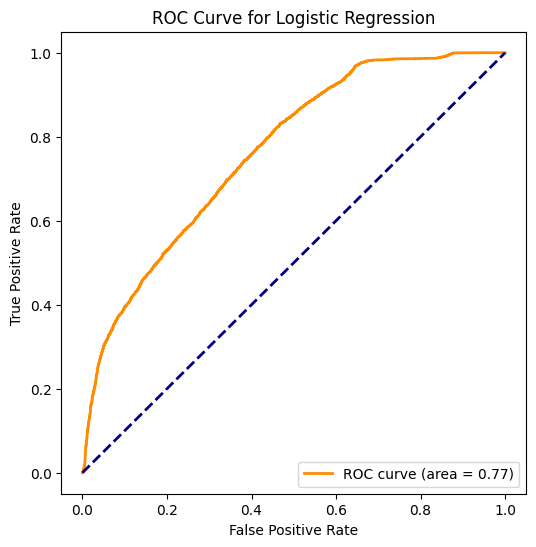

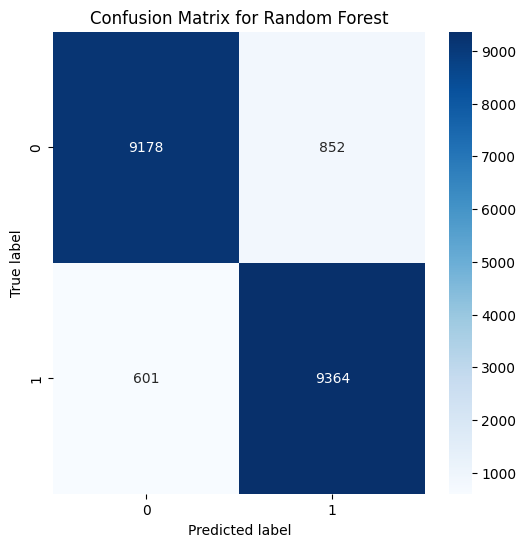

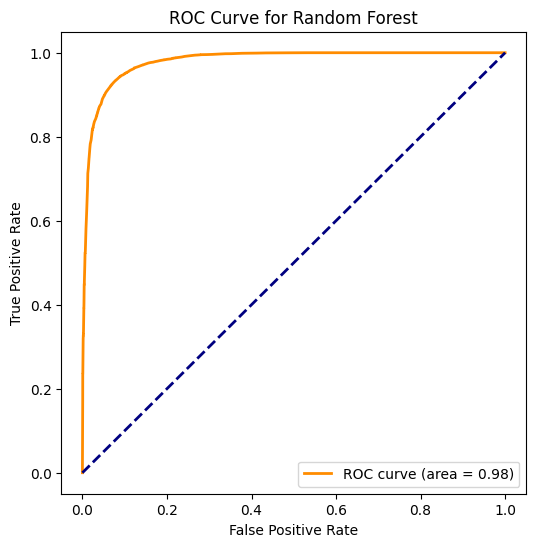

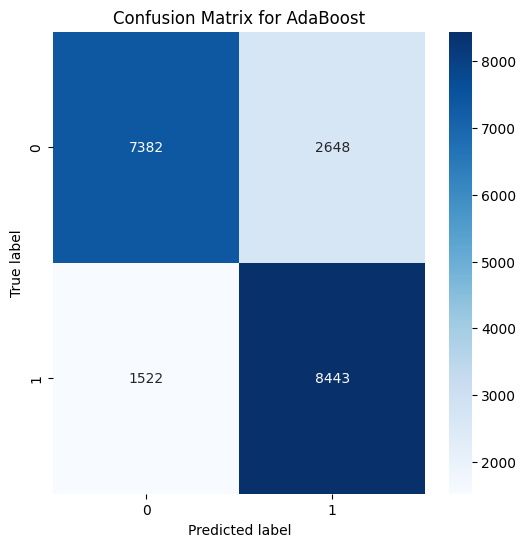

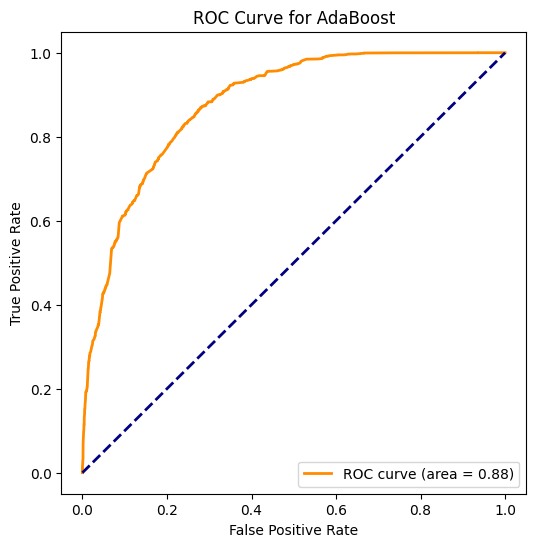

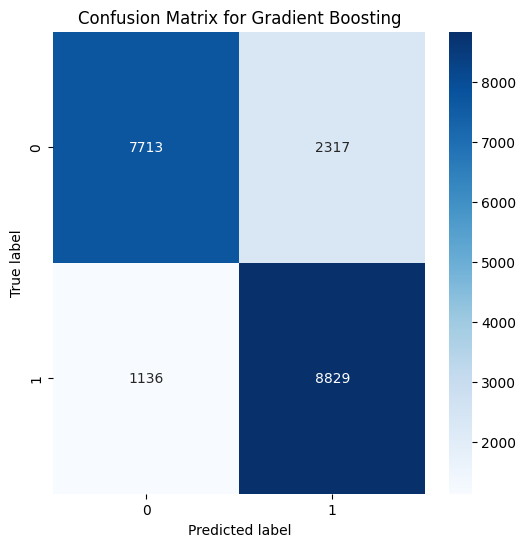

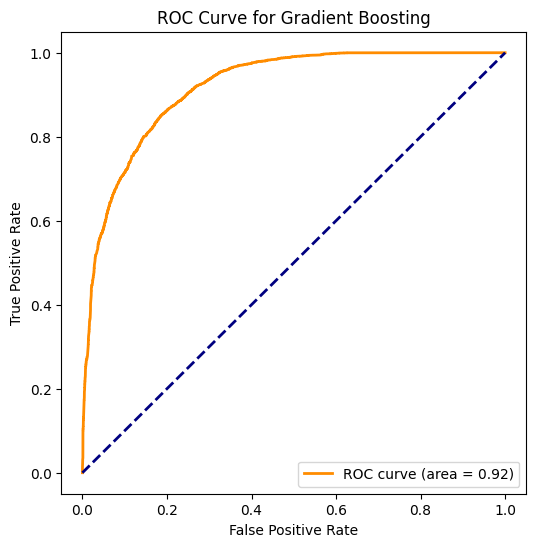

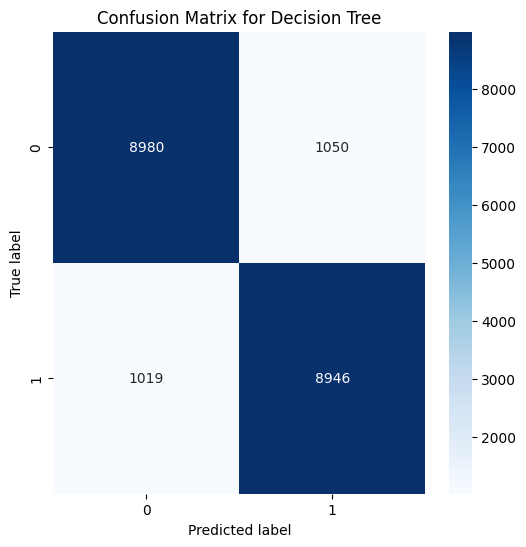

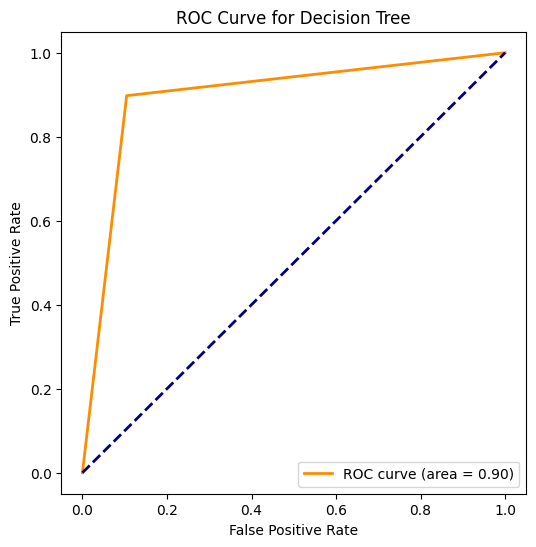


Logistic Regression Classifier:
Accuracy: 0.6806701675418855 
F1-Score: 0.7182383831251932 
Recall: 0.8166583040642248 
Precision: 0.6409892879647133 
AUC-ROC: 0.765260445457406 
Confusion Matrix:
 [[5472 4558]
 [1827 8138]]

Random Forest Classifier:
Accuracy: 0.9273318329582395 
F1-Score: 0.9280015856498687 
Recall: 0.9396889111891621 
Precision: 0.9166014095536413 
AUC-ROC: 0.9796048432724906 
Confusion Matrix:
 [[9178  852]
 [ 601 9364]]

AdaBoost Classifier:
Accuracy: 0.7914478619654913 
F1-Score: 0.8019566869300911 
Recall: 0.8472654290015053 
Precision: 0.7612478586241096 
AUC-ROC: 0.8794465474624797 
Confusion Matrix:
 [[7382 2648]
 [1522 8443]]

Gradient Boosting Classifier:
Accuracy: 0.8273068267066767 
F1-Score: 0.8364359812420066 
Recall: 0.886001003512293 
Precision: 0.7921227346133142 
AUC-ROC: 0.91765270170422 
Confusion Matrix:
 [[7713 2317]
 [1136 8829]]
malicious    50150
normal       49824
Name: traffic_label, dtype: int64


,Classifier,Accuracy,F1-Score,Recall,Precision,AUC-ROC,Running Time (s)
0,Logistic Regression,0.680670,0.718238,0.816658,0.640989,0.765260,1.008452
1,Random Forest,0.927332,0.928002,0.939689,0.916601,0.979605,31.193358
2,AdaBoost,0.791448,0.801957,0.847265,0.761248,0.879447,12.242463
3,Gradient Boosting,0.827307,0.836436,0.886001,0.792123,0.917653,58.336880
4,Decision Tree,0.896524,0.896348,0.897742,0.894958,0.896528,2.155845



Process Completed: Time: 0:03:53.141374


**Process Completeed**

In [3]:
# Reduced Features are trained - 100 000 instances (100 000 rows - each row is an instance - each row comprises 50 features - will be later reduced to 34 features
# Cross validation applied + Kfold = 5, Hyperparameter tuning applied
# 5 Machine Learning exectuted in this environment: RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier, LogisticRegression
# Bagging (Bootstrap Aggregating) It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each tree is trained on a random subset of the data.
# AdaBoostClassifier (Adaptive Boosting): Boosting. It combines multiple weak classifiers to create a strong classifier. Each classifier is trained on data, taking into account the previous classifiers' mistakes, by adjusting the weights of incorrectly classified instances.
# GradientBoostingClassifier: Boosting. It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Each new model is trained to correct the errors made by previous models.
# DecisionTreeClassifier: Neither bagging nor boosting. It is a single decision tree and can be used as a base estimator in bagging and boosting methods.
# LogisticRegression: Neither bagging nor boosting. It is a single model that uses a logistic function to model a binary dependent variable. However, it can be used as a base estimator in ensemble methods.

# **Import Libraries**
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display, Markdown

# **Function Definitions**
def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Initialize a dictionary to store the metrics and running times
model_performance = {
    'Classifier': [],
    'Accuracy': [],
    'F1-Score': [],
    'Recall': [],
    'Precision': [],
    'AUC-ROC': [],
    'Running Time (s)': []
}

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

        # Convert IP columns to string, handling NaN values
        df['src_ip'] = df['src_ip'].fillna('unknown').astype(str)
        df['dst_ip'] = df['dst_ip'].fillna('unknown').astype(str)

        # IP Address checks
        normal_src_ip_ranges = ['192.168.', '10.', '172.']
        df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
        df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'


    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')

# Remove duplicate rows if any
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

# Get the number of instances (rows)
num_instances = df.shape[0]
print("Number of instances:", num_instances)

df = label_traffic(df)
display(Markdown("**step 1 - label_traffic new column added to the dataset**"))
display(df.head(5))

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded and ready to be Preprocessed", overall_start_time)

# Handle mixed types by converting to appropriate types or filling NaNs
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == np.float64 else x.fillna('Unknown'))
display(Markdown("**step 3 - NaN values and mixed types Handled**"))
display(df.head())

# Encode categorical labels and create dummies
df = pd.get_dummies(df, columns=['proto'])
label_encoder = LabelEncoder()
df['traffic_label_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)
display(Markdown("**step 4 - After Encodign categorical labels**"))
display(df.head(5))

# Now, drop the specified columns and all columns starting with 'b_', except for 'traffic_label' and 'traffic_label_encoded'
columns_to_drop = ['flow_key', 'src_ip_numeric', 'min_ps', 'max_ps',
                   'f_flowStart', 'f_flowEnd', 'f_flowDuration', 'f_min_piat'] + [col for col in df.columns if col.startswith('b_')]
# Do not drop 'traffic_label' and 'traffic_label_encoded' here as they're needed for splitting
df.drop(columns_to_drop, axis=1, inplace=True)
display(Markdown("**Specific Features dropped**"))
display(df.head(5))

# **Splitting the Dataset**
# Split data into features (X) and target (y)
X = df.drop(['traffic_label', 'traffic_label_encoded'], axis=1)
y = df['traffic_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the first few rows of the training data
display(Markdown("**Training Data (Features):**"))
display(X_train.head())

display(Markdown("**Training Data (Target):**"))
display(y_train.head())

# Display the first few rows of the testing data
display(Markdown("**Testing Data (Features):**"))
display(X_test.head())

display(Markdown("**Testing Data (Target):**"))
display(y_test.head())


record_time("Data Split into Training 80% and Testing 20% of the dataset", overall_start_time)

# Filter only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# **Feature Scaling**
# Apply scaling to numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
record_time("Scaling to numeric data Completed", overall_start_time)
print("step 5 - Scaling to numeric data Completed")
display(Markdown("**step 5 - Scaling oto numeric data Completed**"))

# **Handling Class Imbalance**
# SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
record_time("SMOT for class imbalance applied", overall_start_time)
display(Markdown("**step 6 - SMOT applied**"))

# Define the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
record_time("StratifiedKFold 5 folds cross-validator Implemented", overall_start_time)
display(Markdown("**step 7 - Cross validation 5 fold applied**"))

# Hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
record_time("Hyperparameter Tuning applied to all models", overall_start_time)
display(Markdown("**step 8 - Hyperparameter Tuning applied**"))

# Suppress ConvergenceWarning for logistic regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)
lr_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ab_clf = AdaBoostClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
ab_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.fit(X_train_resampled, y_train_resampled)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate recall for each model
lr_recall = recall_score(y_test, lr_clf.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_clf.predict(X_test_scaled))
ab_recall = recall_score(y_test, ab_clf.predict(X_test_scaled))
gb_recall = recall_score(y_test, gb_clf.predict(X_test_scaled))
dt_recall = recall_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate precision for each model
lr_precision = precision_score(y_test, lr_clf.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_clf.predict(X_test_scaled))
ab_precision = precision_score(y_test, ab_clf.predict(X_test_scaled))
gb_precision = precision_score(y_test, gb_clf.predict(X_test_scaled))
dt_precision = precision_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate AUC-ROC for each model
lr_auc = roc_auc_score(y_test, lr_clf.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])
ab_auc = roc_auc_score(y_test, ab_clf.predict_proba(X_test_scaled)[:, 1])
gb_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test_scaled)[:, 1])
dt_auc = roc_auc_score(y_test, dt_clf.predict_proba(X_test_scaled)[:, 1])

# Print the results along with confusion matrix numbers
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1, "\nRecall:", lr_recall, "\nPrecision:", lr_precision, "\nAUC-ROC:", lr_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, lr_clf.predict(X_test_scaled)))
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1, "\nRecall:", rf_recall, "\nPrecision:", rf_precision, "\nAUC-ROC:", rf_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, rf_clf.predict(X_test_scaled)))
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1, "\nRecall:", ab_recall, "\nPrecision:", ab_precision, "\nAUC-ROC:", ab_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, ab_clf.predict(X_test_scaled)))
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1, "\nRecall:", gb_recall, "\nPrecision:", gb_precision, "\nAUC-ROC:", gb_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, gb_clf.predict(X_test_scaled)))

class_counts = df['traffic_label'].value_counts()
print(class_counts)

# Initialize a dictionary to store the metrics and running times
model_performance = {
    'Classifier': [],
    'Accuracy': [],
    'F1-Score': [],
    'Recall': [],
    'Precision': [],
    'AUC-ROC': [],
    'Running Time (s)': []
}

# Function to evaluate the model and store its performance
def evaluate_model(clf, name, X_train, y_train, X_test, y_test):
    start_time = time.time()  # Start time
    clf.fit(X_train, y_train)  # Training the model
    y_pred = clf.predict(X_test)  # Predicting using the model
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability predictions for AUC
    end_time = time.time()  # End time

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    running_time = end_time - start_time  # Calculate running time

    # Storing metrics and running time in the dictionary
    model_performance['Classifier'].append(name)
    model_performance['Accuracy'].append(accuracy)
    model_performance['F1-Score'].append(f1)
    model_performance['Recall'].append(recall)
    model_performance['Precision'].append(precision)
    model_performance['AUC-ROC'].append(auc_roc)
    model_performance['Running Time (s)'].append(running_time)

# Evaluate each model
evaluate_model(lr_clf, 'Logistic Regression', X_train_resampled, y_train_resampled, X_test_scaled, y_test)
evaluate_model(rf_clf, 'Random Forest', X_train_resampled, y_train_resampled, X_test_scaled, y_test)
evaluate_model(ab_clf, 'AdaBoost', X_train_resampled, y_train_resampled, X_test_scaled, y_test)
evaluate_model(gb_clf, 'Gradient Boosting', X_train_resampled, y_train_resampled, X_test_scaled, y_test)
evaluate_model(dt_clf, 'Decision Tree', X_train_resampled, y_train_resampled, X_test_scaled, y_test)

# Convert the performance dictionary to a DataFrame for easy viewing
performance_df = pd.DataFrame(model_performance)

# Display the performance table
display(performance_df)
print("\nProcess Completed: Time:", datetime.datetime.now() - overall_start_time)
display(Markdown("**Process Completeed**"))
